Shape of dataset: (457, 15)

Data types:
 Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

Missing values:
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryAc

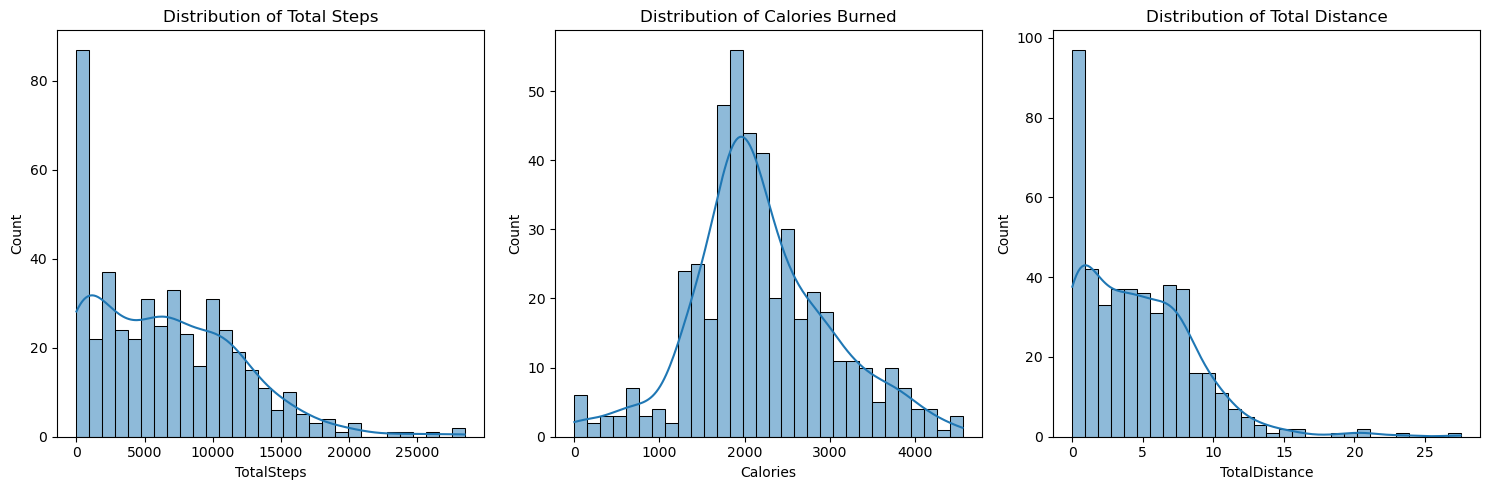

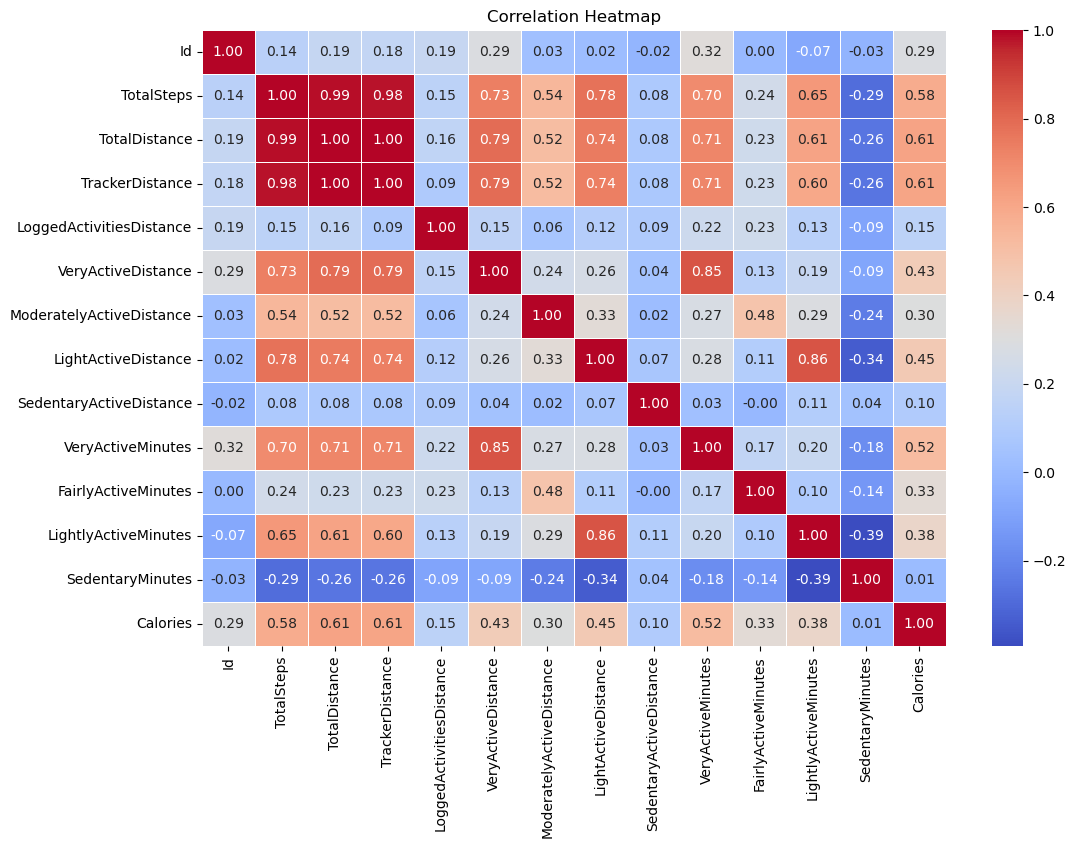

In [3]:
# Fitbit Daily Activity EDA

# 📦 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load the data
df = pd.read_csv("dailyActivity_merged.csv")

# 🧼 Convert date column to datetime format
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"])

# 🔍 Basic info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# 📊 Summary statistics
print("\nSummary Statistics:\n", df.describe())

# 📈 Distribution plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df["TotalSteps"], bins=30, kde=True)
plt.title("Distribution of Total Steps")

plt.subplot(1, 3, 2)
sns.histplot(df["Calories"], bins=30, kde=True)
plt.title("Distribution of Calories Burned")

plt.subplot(1, 3, 3)
sns.histplot(df["TotalDistance"], bins=30, kde=True)
plt.title("Distribution of Total Distance")

plt.tight_layout()
plt.show()

# 🔗 Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


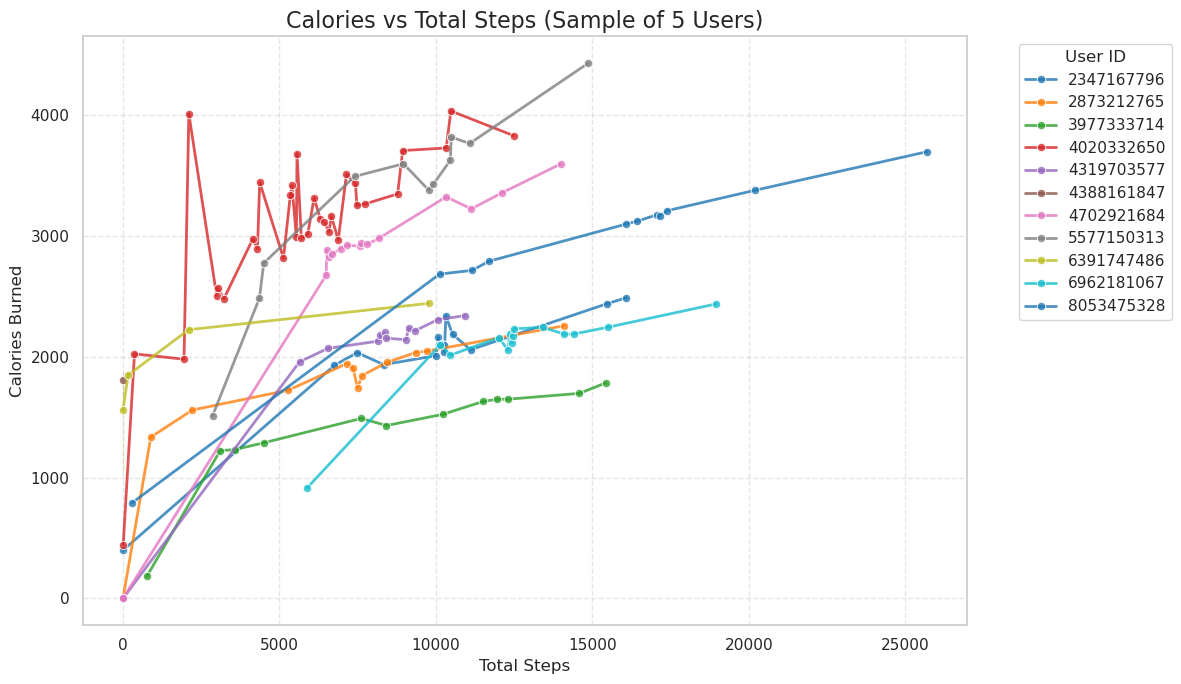

In [7]:
# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Load data
df = pd.read_csv("dailyActivity_merged.csv")
df["ActivityDate"] = pd.to_datetime(df["ActivityDate"])

# 🎯 Select 5 random users
sample_ids = df["Id"].drop_duplicates().sample(11, random_state=42)
filtered_df = df[df["Id"].isin(sample_ids)].sort_values(by=["Id", "ActivityDate"])

# 📈 Plot
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

sns.lineplot(
    data=filtered_df,
    x="TotalSteps",
    y="Calories",
    hue="Id",
    marker="o",
    linewidth=2,
    alpha=0.8,
    palette="tab10"
)

plt.title("Calories vs Total Steps (Sample of 5 Users)", fontsize=16)
plt.xlabel("Total Steps", fontsize=12)
plt.ylabel("Calories Burned", fontsize=12)
plt.legend(title="User ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
